In [78]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.font_manager as fm
import random as rd

## Diabetes (clustering)

다음의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)

In [79]:
diabetes=datasets.load_diabetes()

In [80]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [81]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

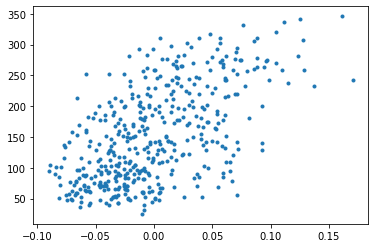

In [82]:
import numpy as np
import matplotlib.pyplot as plt

X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
plt.plot(X_p,X_d,'.')

No handles with labels found to put in legend.


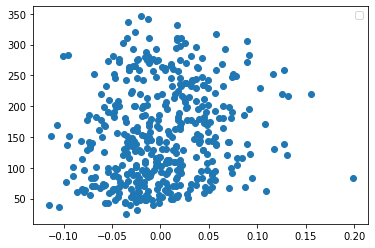

In [83]:
x=diabetes.data[:,5]
y=diabetes.target
g=np.c_[X,Y]
m=G.shape[0]
n=G.shape[1]
k=9

plt.scatter(x,y)
plt.legend()
plt.show()

In [84]:
Centroids=np.array([]).reshape(n,0)
Centroids
for i in range(k):
    rand=rd.random()
    Centroids = np.c_[Centroids,(((max(G[:,0])-min(G[:,0]))*rand+min(G[:,0])),max(G[:,1])*rand-min(G[:,1]))]
    
Centroids

array([[-2.72313495e-02, -3.49185683e-02, -6.61366283e-02,
        -8.43797554e-02,  1.01056651e-01, -1.38008597e-02,
        -3.08063210e-02,  1.15209216e-01,  2.28434498e-02],
       [ 9.55520985e+01,  8.46711620e+01,  4.04833040e+01,
         1.46609208e+01,  2.77138396e+02,  1.14562395e+02,
         9.04918759e+01,  2.97170760e+02,  1.66430882e+02]])

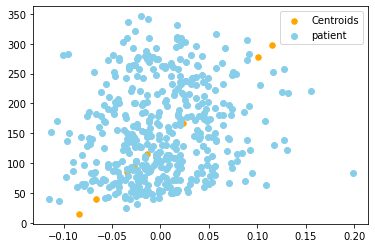

In [85]:
plt.scatter(Centroids[0,:],Centroids[1,:],s=30,c='orange',label='Centroids')
plt.scatter(x,y,c='skyblue', label='patient')
plt.legend()
plt.show()

In [86]:
EuclidianDistance=np.array([]).reshape(m,0)

for k in range(k):
    tempDist=np.sum((G-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]

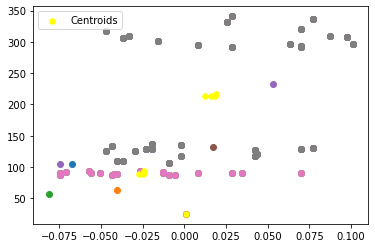

In [94]:
np.argmin(EuclidianDistance,axis=1)
c=np.argmin(EuclidianDistance,axis=1)+1


L={}
for k in range(K):
    L[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    L[c[i]]=np.c_[L[C[i]],g[i]]
for k in range(K):
    L[k+1]=L[k+1].T
for k in range(K):
     Centroids[:,k]=np.mean(L[k+1],axis=0)
Output=L

for k in range(k):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1])
plt.scatter(Centroids[0,:],Centroids[1,:],s=30,c='yellow',label='Centroids')
plt.legend()
plt.show()

2. sklearn을 이용해서

In [91]:
kmeans=KMeans(n_clusters=10)
data=np.transpose([diabetes.data[:,5],diabetes.target])
kmeans.fit(data)
center=kmeans.cluster_centers_

Centeroid [[-4.88083412e-03  9.26875000e+01]
 [-2.06401159e-04  2.69975610e+02]
 [ 4.82766690e-03  1.77102041e+02]
 [ 8.04795680e-03  1.19770833e+02]
 [-1.35980873e-02  6.87368421e+01]
 [ 2.25959287e-02  2.40088235e+02]
 [ 8.64424366e-03  3.10900000e+02]
 [-4.56678696e-03  1.45877551e+02]
 [ 1.37936264e-02  2.07365854e+02]
 [-2.07652146e-02  4.78461538e+01]]


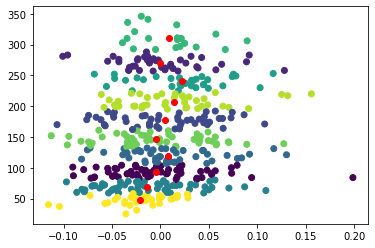

In [92]:
plt.scatter(diabetes.data[:,5],diabetes.target,c=kmeans.labels_,marker='o')
plt.scatter(center[:,0],center[:,1],color = 'red')
print("Centeroid", center)

3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

elbow 기법을 쓰거나 그래프에서 기울기가 낮아지는 구간을 찾는다.